**Done Using Colab**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cleaned_test.csv to cleaned_test.csv
Saving cleaned_train.csv to cleaned_train.csv
User uploaded file "cleaned_test.csv" with length 231677 bytes
User uploaded file "cleaned_train.csv" with length 798503 bytes


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
train , test = pd.read_csv('cleaned_train.csv'), pd.read_csv('cleaned_test.csv')

In [42]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance,Amount (Million Naira)
0,VHL12546,17,142,2011,18,94903.339506,1,0,0,0,0,1,-0.071802,11.460614,0.127860,2.2
1,VHL18827,19,1204,2012,18,125000.000000,0,1,0,0,0,1,0.260450,11.736069,0.529591,3.5
2,VHL19499,29,1040,2010,17,110852.000000,0,0,1,0,1,0,0.104263,11.615951,0.349130,9.2
3,VHL17991,34,590,2017,3,30000.000000,1,0,0,0,1,0,-0.788303,10.308953,-1.156289,22.8
4,VHL12170,53,659,2002,17,125206.000000,0,1,0,0,0,1,0.262724,11.737716,0.532124,2.6


In [43]:
all = pd.concat([train, test],ignore_index = True)

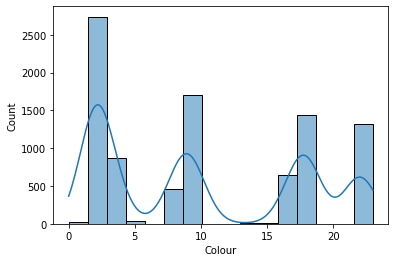

In [44]:
sns.histplot(x = 'Colour', kde = True, data  = all)

In [45]:
train.shape, test.shape

((7205, 16), (2061, 15))

In [46]:
all['log_Colour'] = np.log([all.Colour])

TypeError: ignored

In [4]:
X = train.drop(columns  = ['VehicleID','Amount (Million Naira)'])
y = train['Amount (Million Naira)']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(random_state = 0,objective ='reg:squarederror',learning_rate = .2, max_depth = 3, min_child_weight = 3)
xgb.fit(X_train,y_train)
xgb_preds = np.exp(xgb.predict(X_test))
mean_squared_error(y_test,xgb_preds,squared=False)

9.403442200185355

In [7]:
 
 
sub_file = pd.DataFrame({
      'VehicleID': test['VehicleID'],
      'Amount (Million Naira)': xgb.predict(test.drop(columns = ['VehicleID']))
  })

sub_file.to_csv('xgboost_final_sunday.csv', index = False)

In [8]:
# XGBRegressor(learning_rate = .2, max_depth = 3, min_child_weight = 2)